# HIV Simple

$\lambda(t) = c * \beta *\frac{I(t)}{S(t) + I(t)}$

$\dot{S(t)} = -\lambda * S(t) + \gamma * I(t) - m * I(t)$

$\dot{I(t)} = \gamma * I(t) - (\mu + m) * I(t)$


With variables:

* $S$: Susceptibles
* $I$: Infective
* $A$: AIDS
* $\beta$: Transmission probability per partnership
* $r$: Recovery rate
* $c$: Partner change rate
* $\gamma$: 1/duration of infectiousness
* $\mu$: 1/duration of AIDS
* $m$: background death rate
* $\alpha$: population growth rate

In [6]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
(N, tmax) = (10000, 150 * 12)
(beta, c) = (.05, .35)
(gamma, mu, m, alpha) = (
        1/(9*12),
        1/(1*12),
        1/(35*12),
        0.025/12
    )
(iInit) = (1)
# Internals and Run Model ##################
(sInit, aInit) = ((N - iInit), 0)
t = np.linspace(0, tmax, tmax * 10)
y0 = (sInit, iInit, aInit)
# Run
ret = odeint(
        model.dHIV, y0, t, args=(N, c, beta, gamma, mu, m, alpha)
    )
(S, I, A) = ret.T

# Plot Population

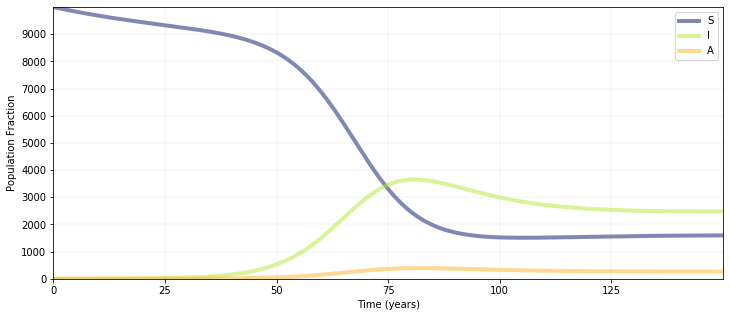

In [7]:
tp = ((S, '#02146b', 'S'), (I, '#b4e830', 'I'), (A, '#ffb428', 'A'))
(fig, ax) = aux.plotEpiDynamicsPop(tp, t/12, tmax/12, N)
ax.set_xticks(np.arange(0, tmax/12, 25))
ax.set_yticks(np.arange(0, N, 1000))
plt.grid(b=True, which='major', lw=.2, alpha=.5, color='#666666', linestyle='--')

# Plot Prevalence

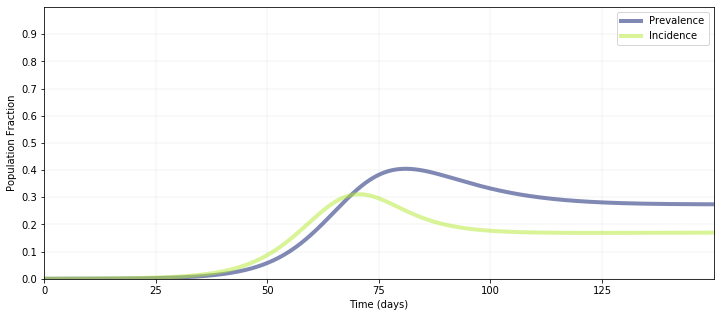

In [9]:
prevalence = (I+A)/N
incidence = (c*beta*I/(S+I)*S)/N*100
tp = (
        (prevalence, '#02146b', 'Prevalence'),
        (incidence, '#b4e830', 'Incidence')
    )
(fig, ax) = aux.plotEpiDynamics(tp, t/12, tmax/12, 1, ymax=.3)
ax.set_xticks(np.arange(0, tmax/12, 25))
ax.set_yticks(np.arange(0, 1, .1))
ax.set_ylim(0, 1)
plt.grid(b=True, which='major', lw=.2, alpha=.5, color='#666666', linestyle='--')